<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

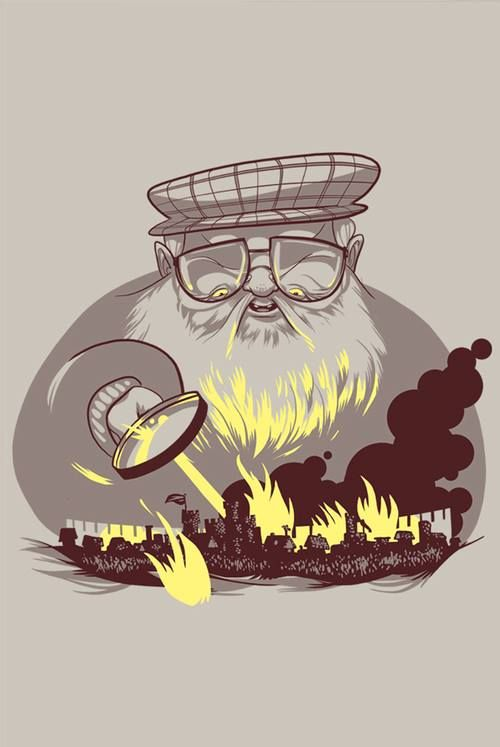

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1304]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

'gdown' is not recognized as an internal or external command,
operable program or batch file.


'gdown' is not recognized as an internal or external command,
operable program or batch file.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1305]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [1306]:
df_train = pd.read_csv('files/game_of_thrones_train.csv', index_col="S.No")
df_test = pd.read_csv('files/game_of_thrones_test.csv', index_col="S.No")
df_train

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [1307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 1 to 1946
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1946 non-null   object 
 1   title             938 non-null    object 
 2   male              1946 non-null   int64  
 3   culture           677 non-null    object 
 4   dateOfBirth       433 non-null    float64
 5   mother            21 non-null     object 
 6   father            26 non-null     object 
 7   heir              23 non-null     object 
 8   house             1519 non-null   object 
 9   spouse            276 non-null    object 
 10  book1             1946 non-null   int64  
 11  book2             1946 non-null   int64  
 12  book3             1946 non-null   int64  
 13  book4             1946 non-null   int64  
 14  book5             1946 non-null   int64  
 15  isAliveMother     21 non-null     float64
 16  isAliveFather     26 non-null     float64
 17  

In [1308]:
df_train_problem = df_train[df_train.columns[df_train.isnull().any()]].copy()
df_train_problem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          717 non-null    object 
 1   culture        488 non-null    object 
 2   dateOfBirth    279 non-null    float64
 3   mother         18 non-null     object 
 4   father         22 non-null     object 
 5   heir           21 non-null     object 
 6   house          1176 non-null   object 
 7   spouse         200 non-null    object 
 8   isAliveMother  18 non-null     float64
 9   isAliveFather  22 non-null     float64
 10  isAliveHeir    21 non-null     float64
 11  isAliveSpouse  200 non-null    float64
 12  age            279 non-null    float64
dtypes: float64(6), object(7)
memory usage: 170.3+ KB


- Заполним age медианой и год рождения соответсвенно тоже
- для поиска медианы создадим общий датасет
- Заполнил `culture`, `house`, `title` -  `Unknown`

In [1309]:
df = pd.concat([df_train, df_test], axis=0)
df['age'].median()
df['male'].value_counts()
# df['spouse'].value_counts()
df['title'].value_counts()

title
Ser                               384
Maester                            39
Archmaester                        21
Lord                               20
Septon                             18
                                 ... 
Lord Captain of the Iron Fleet      1
Prince of the Narrow Sea            1
red hand                            1
Lord of the Crossing                1
Slave of R'hllor                    1
Name: count, Length: 262, dtype: int64

In [1310]:
df_train['age'].fillna(int(df['age'].median()), inplace=True)
df_train['dateOfBirth'].fillna(int(df['dateOfBirth'].median()), inplace=True)

df_test['age'].fillna(int(df['age'].median()), inplace=True)
df_test['dateOfBirth'].fillna(int(df['dateOfBirth'].median()), inplace=True)

df_train['culture'].fillna('unknown', inplace=True)
df_test['culture'].fillna('unknown', inplace=True)

df_train['house'].fillna('unknown', inplace=True)
df_test['house'].fillna('unknown', inplace=True)

df_train['title'].fillna('unknown', inplace=True)
df_test['title'].fillna('unknown', inplace=True)

df_train_problem = df_train[df_train.columns[df_train.isnull().any()]].copy()
df_train_problem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mother         18 non-null     object 
 1   father         22 non-null     object 
 2   heir           21 non-null     object 
 3   spouse         200 non-null    object 
 4   isAliveMother  18 non-null     float64
 5   isAliveFather  22 non-null     float64
 6   isAliveHeir    21 non-null     float64
 7   isAliveSpouse  200 non-null    float64
dtypes: float64(4), object(4)
memory usage: 109.5+ KB


C:\Users\emsol\AppData\Local\Temp\ipykernel_12544\3697086248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['age'].fillna(int(df['age'].median()), inplace=True)
C:\Users\emsol\AppData\Local\Temp\ipykernel_12544\3697086248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [1311]:
df_test_problem = df_test[df_test.columns[df_test.isnull().any()]].copy()
df_test_problem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mother         3 non-null      object 
 1   father         4 non-null      object 
 2   heir           2 non-null      object 
 3   spouse         76 non-null     object 
 4   isAliveMother  3 non-null      float64
 5   isAliveFather  4 non-null      float64
 6   isAliveHeir    2 non-null      float64
 7   isAliveSpouse  76 non-null     float64
dtypes: float64(4), object(4)
memory usage: 27.4+ KB


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [1312]:
df_train["isPopular"] = df_train["popularity"].apply(lambda x: 1 if x > 0.5 else 0)
df_test["isPopular"] = df_test["popularity"].apply(lambda x: 1 if x > 0.5 else 0)

df_train["boolDeadRelations"] = df_train["numDeadRelations"].apply(lambda x: 1 if x == True else 0)
df_test["boolDeadRelations"] = df_test["numDeadRelations"].apply(lambda x: 1 if x == True else 0)
df_test['isPopular'].value_counts()

isPopular
0    344
1     45
Name: count, dtype: int64

In [1313]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Unknown': ['unknown']
}

def get_cult(x: str) -> str:
    for key, value in cult.items():
        if x.lower() in value:
            return key
    return 'Other'

df_train['culture'] = df_train['culture'].apply(get_cult)

df_train['culture'].value_counts()

culture
Unknown           1069
Other              196
Northmen           103
Free Folk           56
Braavosi            40
Dornish             21
Ghiscari            18
Westermen           14
Reach               13
Summer Islands       6
Qartheen             6
Stormlander          4
Lysene               3
Westerosi            3
Andal                2
Myrish               2
Norvoshi             1
Name: count, dtype: int64

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

- Удаляем живость всех родстенников, тк не имеют достаточное количество данных их их легко заменяет `boolDeadRelations`
- самих родственников тоже сносим, тк тоже мног пустот

In [1314]:
df_train_2 = df_train.drop(['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
                            'heir', 'father', 'mother', 'spouse'], inplace=False, axis=1)
df_test_2 = df_test.drop(['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
                            'heir', 'father', 'mother', 'spouse'], inplace=False, axis=1)

df_test_problem = df_test_2[df_test_2.columns[df_test_2.isnull().any()]].copy()
df_test_problem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Empty DataFrame


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

- про верим `house`

In [1315]:
df_test_2['house'].value_counts()

house
unknown                        46
House Targaryen                22
House Martell                  18
Night's Watch                  17
House Stark                    16
                               ..
House Erenford                  1
House Grell                     1
brotherhood without banners     1
House Webber                    1
Three-eyed crow                 1
Name: count, Length: 138, dtype: int64

- объединим совсем непопулярные дома в группу `other`, чтобы уменьшить дизбаланс классов

In [1316]:
little_house = df['house'].value_counts()[df['house'].value_counts() <= 5].index.tolist()

df_test_2['house'] = df_test_2['house'].apply(lambda x: x if x not in little_house else 'Other')
df_train_2['house'] = df_train_2['house'].apply(lambda x: x if x not in little_house else 'Other')

df_train_2['house'].value_counts()[:20]

house
Other                 447
unknown               381
House Frey             89
Night's Watch          88
House Stark            56
House Targaryen        40
House Lannister        36
House Tyrell           33
House Greyjoy          30
House Osgrey           20
Faith of the Seven     15
House Botley           12
House Hightower        12
House Arryn            11
House Martell          11
House Florent          10
House Crakehall        10
House Bracken           9
House Waynwood          9
House Brax              8
Name: count, dtype: int64

- Сделаем тоже самое с `title`

In [1317]:
df['isAlive'].value_counts()

isAlive
1.0    1212
0.0     345
Name: count, dtype: int64

In [1318]:
little_title = df['title'].value_counts()[df['title'].value_counts() <= 10].index.tolist()

df_test_2['title'] = df_test_2['title'].apply(lambda x: x if x not in little_title else 'Other')
df_train_2['title'] = df_train_2['title'].apply(lambda x: x if x not in little_title else 'Other')

df_train_2['title'].value_counts()

title
unknown        840
Ser            306
Other          292
Maester         29
Archmaester     21
Lord            19
Septon          16
Winterfell      15
Lady            10
Princess         9
Name: count, dtype: int64

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [1319]:
df_train_2['title'].unique()

array(['unknown', 'Other', 'Ser', 'Archmaester', 'Maester', 'Lord',
       'Lady', 'Princess', 'Septon', 'Winterfell'], dtype=object)

In [1320]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

df_train_2['culture'] = le.fit_transform(df_train_2['culture'])
df_train_2['house'] = le.fit_transform(df_train_2['house'])
df_train_2['title'] = le.fit_transform(df_train_2['title'])
# df_train_2 = pd.get_dummies(df_train_2, columns=['title'])

df_test_2['culture'] = le.fit_transform(df_test_2['culture'])
df_test_2['house'] = le.fit_transform(df_test_2['house'])
df_test_2['title'] = le.fit_transform(df_test_2['title'])
# df_test_2 = pd.get_dummies(df_test_2, columns=['title'])

In [1321]:
df_train_2['name_length'] = df_train_2['name'].apply(len)
df_test_2['name_length'] = df_test_2['name'].apply(len)

df_train_3 = df_train_2.drop(['name'], inplace=False, axis=1)
df_test_3 = df_test_2.drop(['name'], inplace=False, axis=1)

df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   int64  
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   int64  
 3   dateOfBirth        1557 non-null   float64
 4   house              1557 non-null   int64  
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isMarried          1557 non-null   int64  
 11  isNoble            1557 non-null   int64  
 12  age                1557 non-null   float64
 13  numDeadRelations   1557 non-null   int64  
 14  popularity         1557 non-null   float64
 15  isAlive            1557 non-null   int64  
 16  isPopular          1557 non-n

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

<Axes: >

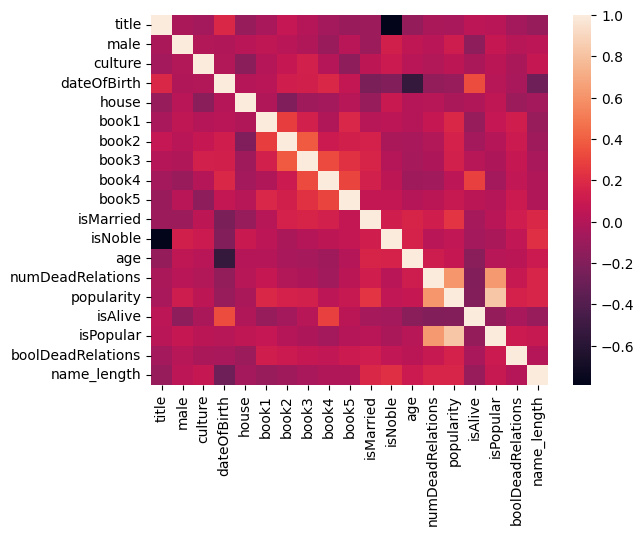

In [1322]:
corr = df_train_3.corr()

sns.heatmap(corr)

<Axes: >

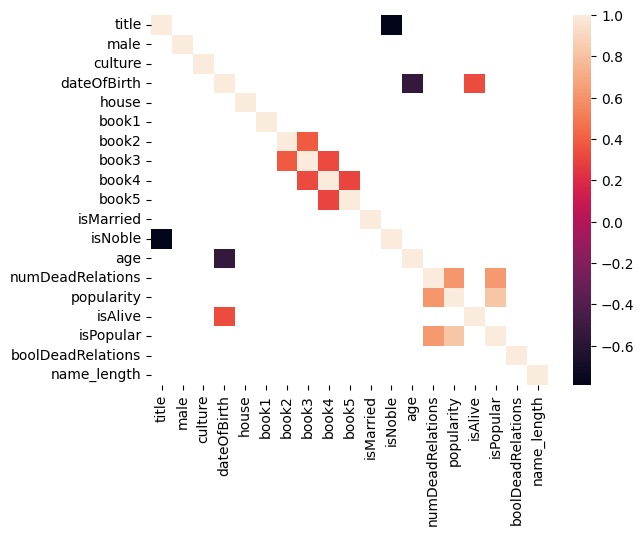

In [1323]:
corr_high = corr[abs(corr) > 0.3]
# corr_high
sns.heatmap(corr_high)

- Попробуем заменть или удалить сильно коррелирующие фичи

In [1324]:
corr['isAlive'].sort_values(ascending=False)

isAlive              1.000000
dateOfBirth          0.332004
book4                0.284014
title                0.039071
book5                0.032531
book3                0.018427
house               -0.017904
culture             -0.035041
boolDeadRelations   -0.046222
isMarried           -0.049381
book2               -0.055998
isNoble             -0.060572
name_length         -0.106691
book1               -0.112468
isPopular           -0.118673
male                -0.148290
age                 -0.173729
popularity          -0.194187
numDeadRelations    -0.198876
Name: isAlive, dtype: float64

In [1325]:
df_train_3['year'] = df_train_3['dateOfBirth'] + df_train_3['age']
df_train_3['books'] = sum([df_train_3['book1'], df_train_3['book2'] * 10, df_train_3['book3'] * 100,
                           df_train_3['book4'] * 1000, df_train_3['book5'] * 10_000])
df_train_3.drop(['dateOfBirth', 'age', 'numDeadRelations', 'isPopular', 'culture'], inplace=True, axis=1)
df_train_3.drop(['book1', 'book2', 'book3', 'book4', 'book5'], inplace=True, axis=1)


df_test_3['year'] = df_test_3['dateOfBirth'] + df_test_3['age']
df_test_3['books'] = sum([df_test_3['book1'], df_test_3['book2'] * 10, df_test_3['book3'] * 100,
                          df_test_3['book4'] * 1000, df_test_3['book5'] * 10_000])
df_test_3.drop(['dateOfBirth', 'age', 'numDeadRelations', 'isPopular', 'culture'], inplace=True, axis=1)
df_test_3.drop(['book1', 'book2', 'book3', 'book4', 'book5'], inplace=True, axis=1)



In [1326]:
df_train_3['isMarried'].value_counts()

isMarried
0    1357
1     200
Name: count, dtype: int64

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [1327]:
X = df_train_3.drop(columns=['isAlive'])
y = df_train_3['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [1328]:
from sklearn.model_selection import train_test_split

In [1329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [1330]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [1331]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [1332]:
from sklearn.metrics import accuracy_score

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [1333]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(**{'max_iter': 10000, 'intercept_scaling': 100, 'class_weight': {0: 0.6, 1: 0.4}, 'C': 10})

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8162


In [1334]:
# from sklearn.model_selection import RandomizedSearchCV

# # Определение сетки гиперпараметров
# param_dist = {
#     'C': [0.1, 1, 10, 100],
#     'max_iter': [100, 1000, 10000],
#     'intercept_scaling': [0.1, 1, 10, 100],
#     'class_weight': ['balanced', {0: 0.6, 1: 0.4}, {0: 0.7, 1: 0.3}, {0: 0.8, 1: 0.2}, {0: 0.9, 1: 0.1}]
# }

# # Создание объекта RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# # Обучение модели с перебором гиперпараметров
# random_search.fit(X_train, y_train)

# # Вывод лучших параметров и оценка модели
# print("Best parameters found: ", random_search.best_params_)
# print("Best cross-validation score: ", random_search.best_score_)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

### AdaBoostClassifier

In [1335]:
# Шаг 1. создание модели
adaBoostclassifier = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1, algorithm='SAMME')

# Шаг 2. обучение модели
adaBoostclassifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = adaBoostclassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8291


In [1336]:
# from sklearn.model_selection import RandomizedSearchCV

# # Определение сетки гиперпараметров
# param_dist = {
#     "n_estimators" : [10, 100, 500, 1000],
#     "learning_rate" : [0.01, 0.1, 1],
# }

# # Создание объекта RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=adaBoostclassifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# # Обучение модели с перебором гиперпараметров
# random_search.fit(X_train, y_train)

# # Вывод лучших параметров и оценка модели
# print("Best parameters found: ", random_search.best_params_)
# print("Best cross-validation score: ", random_search.best_score_)

### RandomForestClassifier

In [1337]:

randomForestClassifier = RandomForestClassifier(**{'n_estimators': 1000, 'min_samples_split': 15,
                                                'max_leaf_nodes': None, 'max_features': None, 'max_depth': 30, 'class_weight': {1: 0.4, 0: 0.6}})

randomForestClassifier.fit(X_train, y_train)

y_pred = randomForestClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8162


In [1338]:
# from sklearn.model_selection import RandomizedSearchCV

# # Определение сетки гиперпараметров
# param_dist = {
#     'n_estimators': [10, 50, 100, 200, 1000, 2000],
#     'max_depth': [None, 10, 20, 30, 40, 50, 60],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'class_weight': [{1: 0.4, 0: 0.6}],
#     'max_features': [None, 'sqrt', 'log2'],
#     'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
# }

# # Создание объекта RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=randomForestClassifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# # Обучение модели с перебором гиперпараметров
# random_search.fit(X_train, y_train)

# # Вывод лучших параметров и оценка модели
# print("Best parameters found: ", random_search.best_params_)
# print("Best cross-validation score: ", random_search.best_score_)

- Проверка на переобучение

In [1339]:
y_pred_train = randomForestClassifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9330


### GaussianProcessClassifier

In [1340]:
gaussianProcessClassifier = GaussianProcessClassifier()

gaussianProcessClassifier.fit(X_train, y_train)

y_pred = gaussianProcessClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7585


### GaussianNB

In [1341]:
gaussianNB = GaussianNB()

gaussianNB.fit(X_train, y_train)

y_pred = gaussianNB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


### KNeighborsClassifier


In [1342]:
kNeighborsClassifier = KNeighborsClassifier()

kNeighborsClassifier.fit(X_train, y_train)

y_pred = kNeighborsClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7628


### SVC


In [1343]:
svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)


Accuracy : 0.7521


In [1344]:
from sklearn.model_selection import RandomizedSearchCV

# Определение сетки гиперпараметров
param_dist = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.1, 1, 10, 100],
    "kernel": [ 'rbf', 'sigmoid'],
    "max_iter": [1000, 10000, 100000]
}

# Создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Обучение модели с перебором гиперпараметров
random_search.fit(X_train, y_train)

# Вывод лучших параметров и оценка модели
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

c:\Users\emsol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\emsol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\emsol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\emsol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\U

Best parameters found:  {'max_iter': 10000, 'kernel': 'rbf', 'gamma': 0.1, 'C': 100}
Best cross-validation score:  0.8007356360715343


### DecisionTreeClassifier

In [1345]:
decisionTreeClassifier = DecisionTreeClassifier()

decisionTreeClassifier.fit(X_train, y_train)

y_pred = decisionTreeClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7735


### Лучшее качество у randomForestClassifier

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [1346]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [1347]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8162


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [1348]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8162


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [1349]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [1350]:
X_final = df_test_3

y_pred = randomForestClassifier.predict(X_final)

In [1351]:
submission = pd.read_csv("files/submission.csv", index_col='S.No')

In [1352]:
len(df_test_3.index), len(y_pred)

(389, 389)

In [1353]:
# Create a DataFrame with S.No and y_pred
answer_df = pd.DataFrame({
    'S.No': df_test_3.index,
    'isAlive': y_pred
})

# Save the DataFrame to a CSV file
answer_df.to_csv("files/answer.csv", index=False)